# LIS(longest increasing subsequence ) problem [question & clarifying question]:
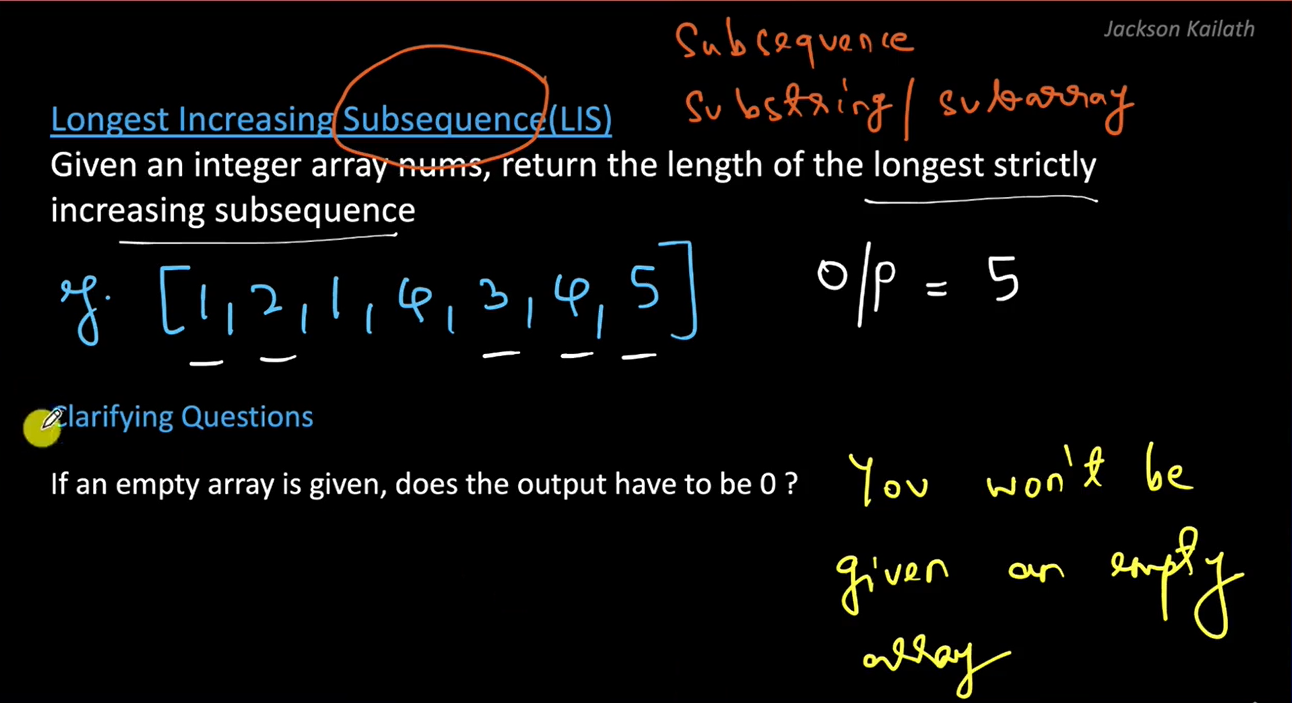 
# LIS(longest increasing subsequence ) problem [test-cases]:
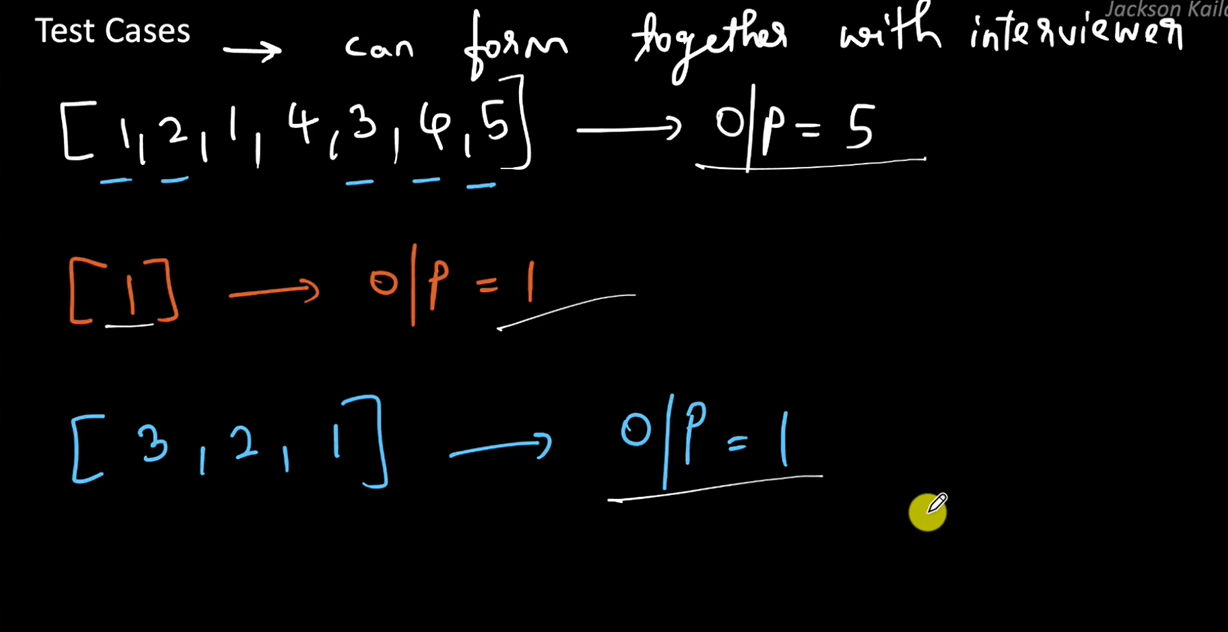
# Coding Exercise: LIS
### Given an integer array nums, return the length of the longest strictly increasing subsequence.

### Example 1:

- Input: nums = [300,9,2,5,3,7,500,400]
- Output: 4
### Explanation: The longest increasing subsequence is [2,3,7,500], therefore the length is 4.

# LIS(longest increasing subsequence ) problem [why it's Dynamic programming question or solved by DP]:
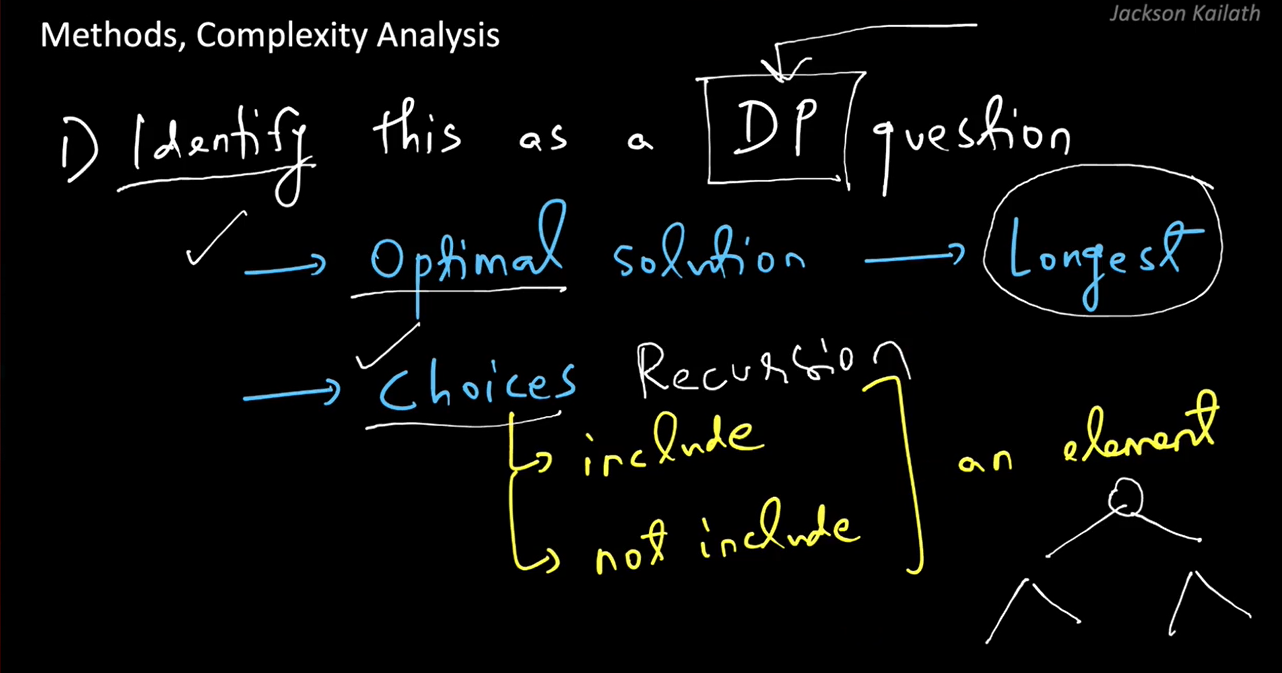

# LIS(longest increasing subsequence ) problem Recursion-approach:
### we should rememeber the index of last included elelemnt ; so that we can compare with curr-element
### if curr element is greater than last/previously included element then we include curr-element else exclude it anyways.
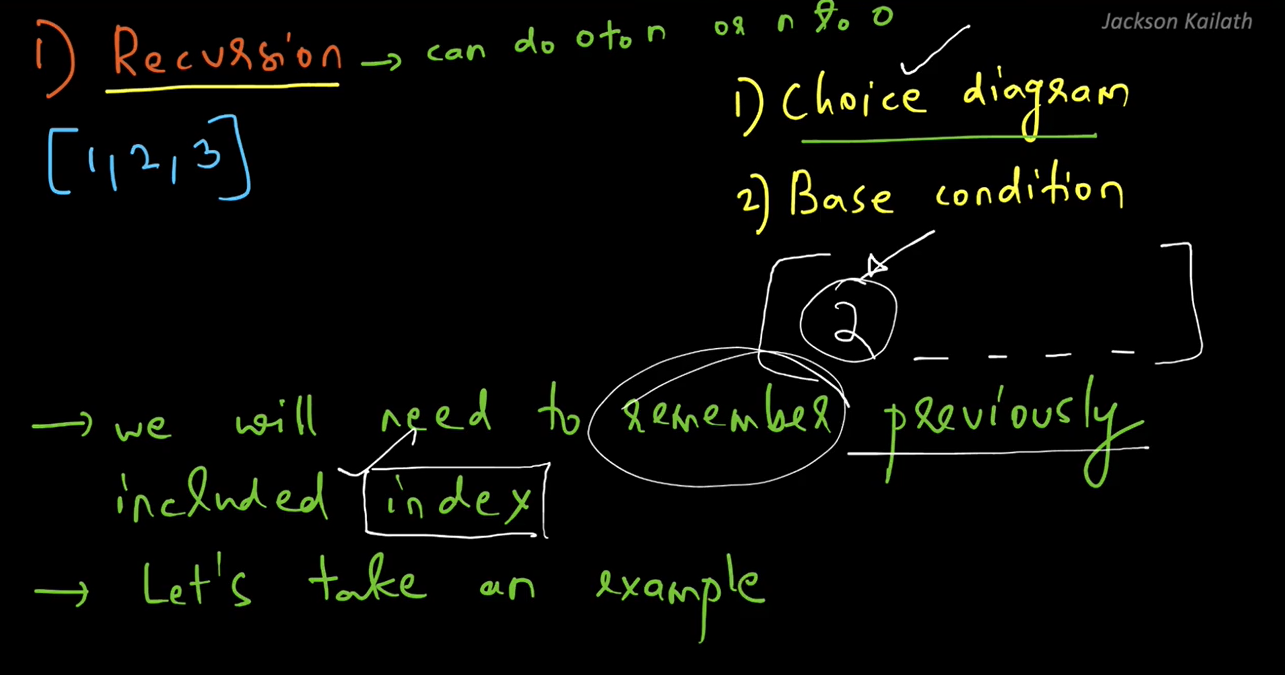
### we will get all kinds of subsequence possible for given array of numbers through inclusion and exclusion branch 
### we just have to chhose the longest or maximum-length increasing-subsequence among these inclusion and exclusion branch.
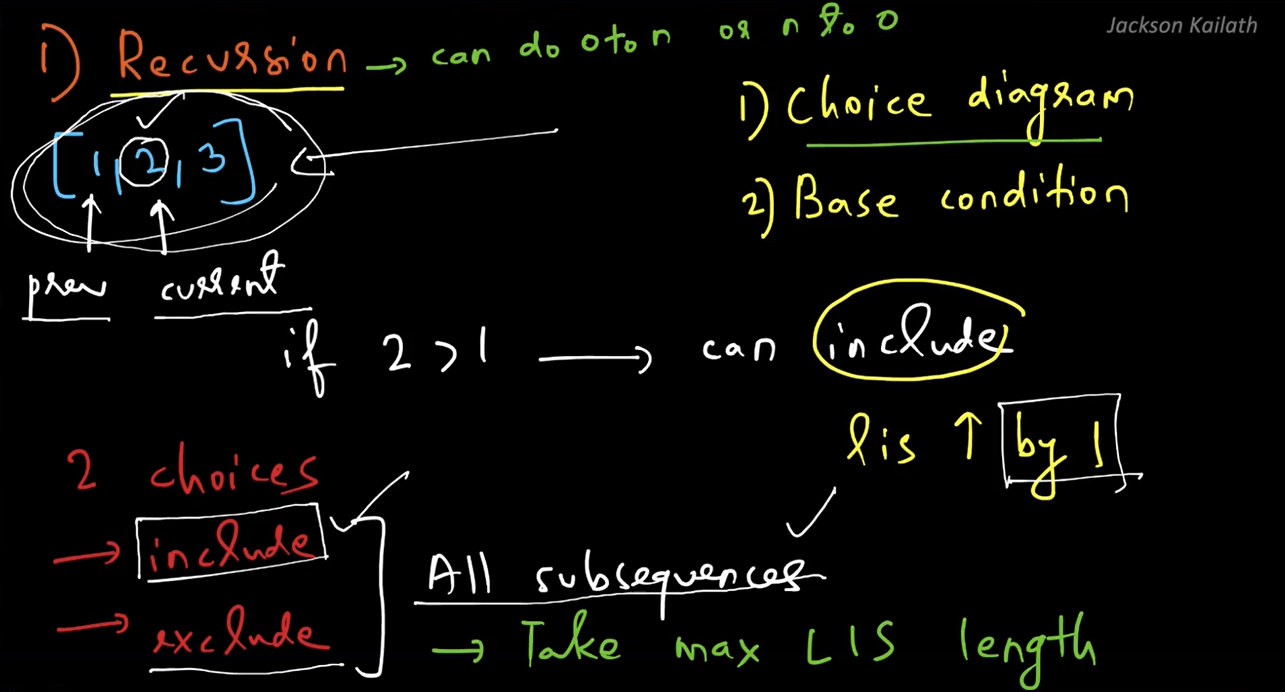
### intuition around approach by ideal-example of LIS:
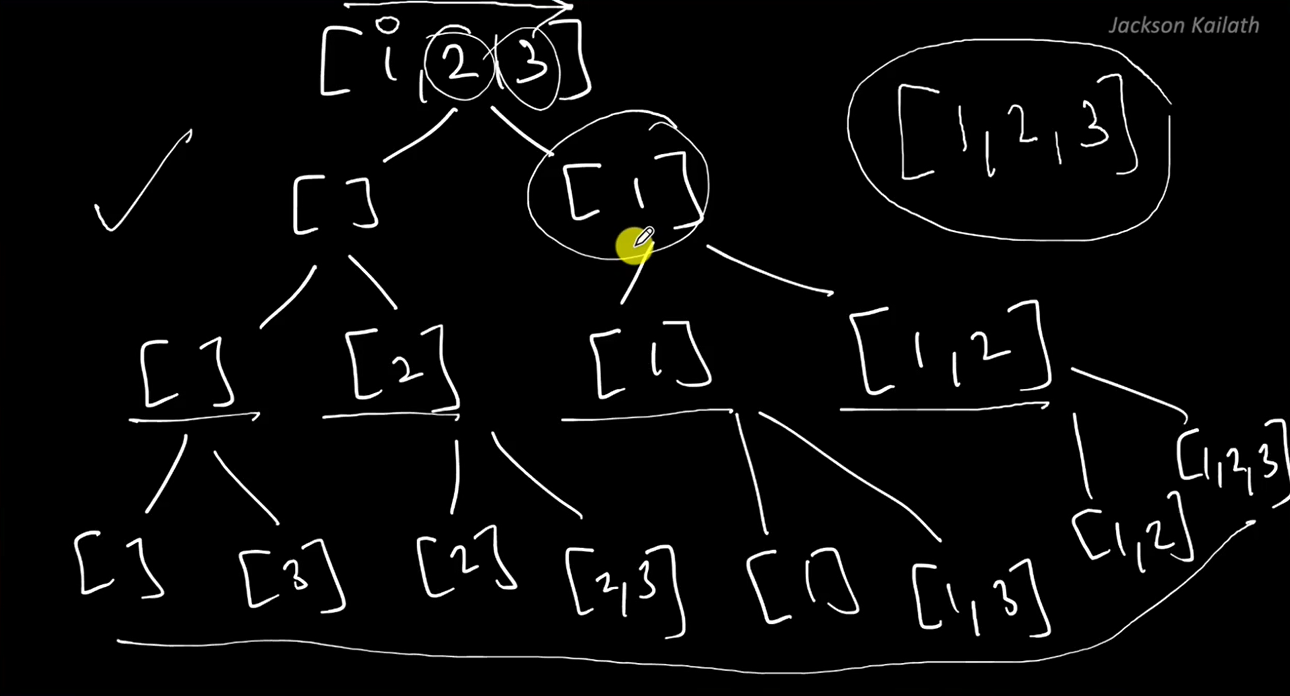
### base-condition:
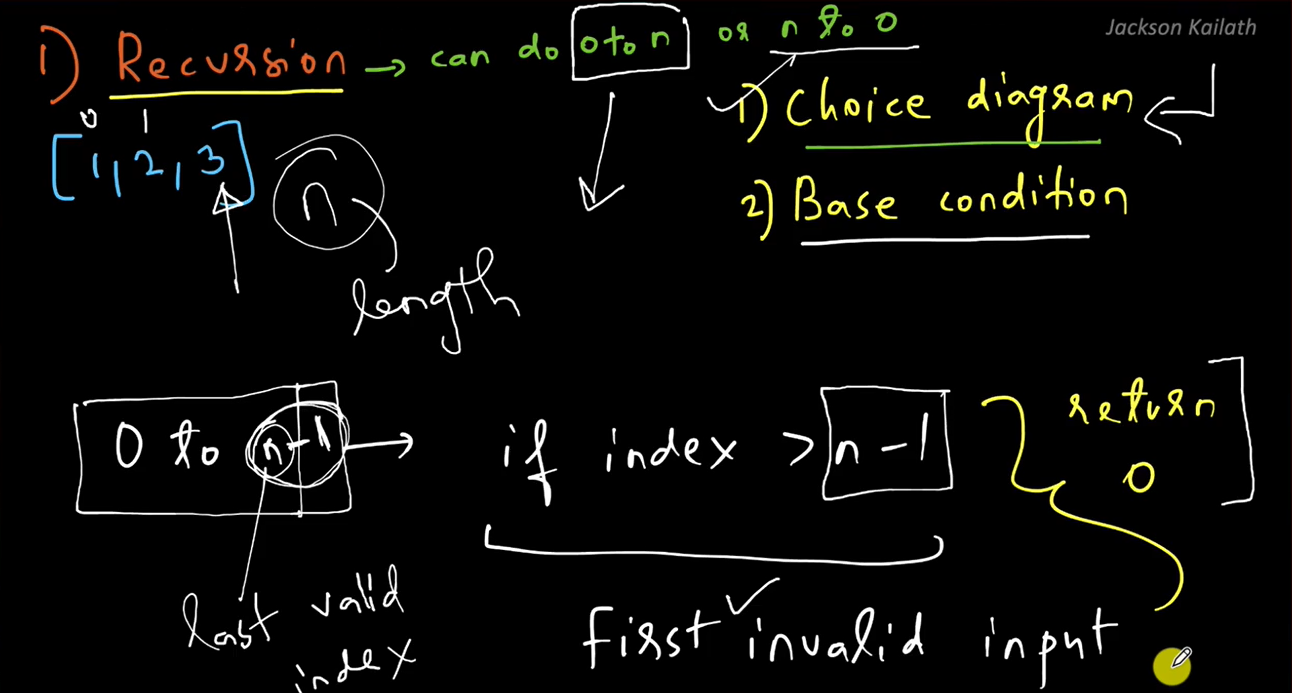
### here our recursive fn takes thwo indexes curr-index and prev-index as argument.
### here we initialised prev-element as -1 means there's right now no element included as prev  //when prev is not yet included 
### if prev-element is not equal to -1 (means prev-ele is included already) then we further include curr-element if its greater than prev-element.  
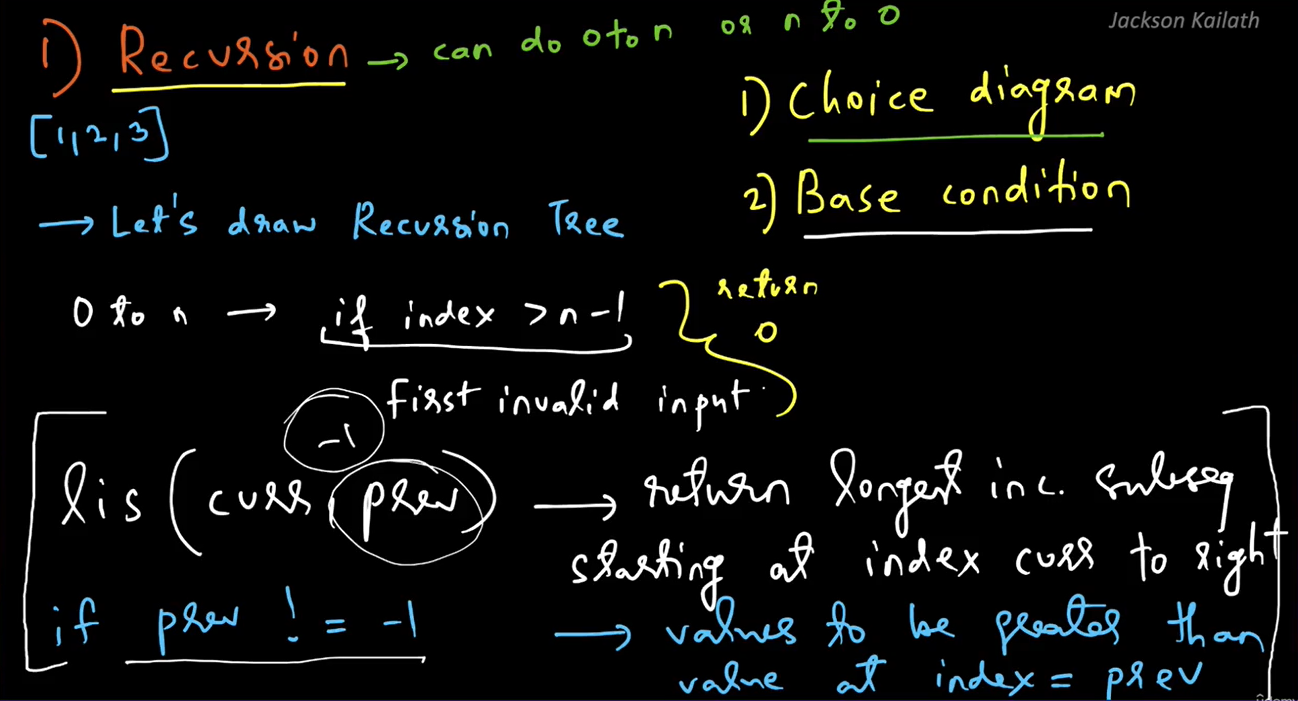
### Recursion-tree:
- while inclusion [if: prev -1 then included simply without comparing ; else: comapring curr greater than prev if yes then include curr], we will move curr-index to the next and prev-index will be equal to curr-index  [ plus adding 1 length ]
     
- while exclusion, we will move curr-index to the next and prev-index will be remain constant [NOT(without) adding 1]
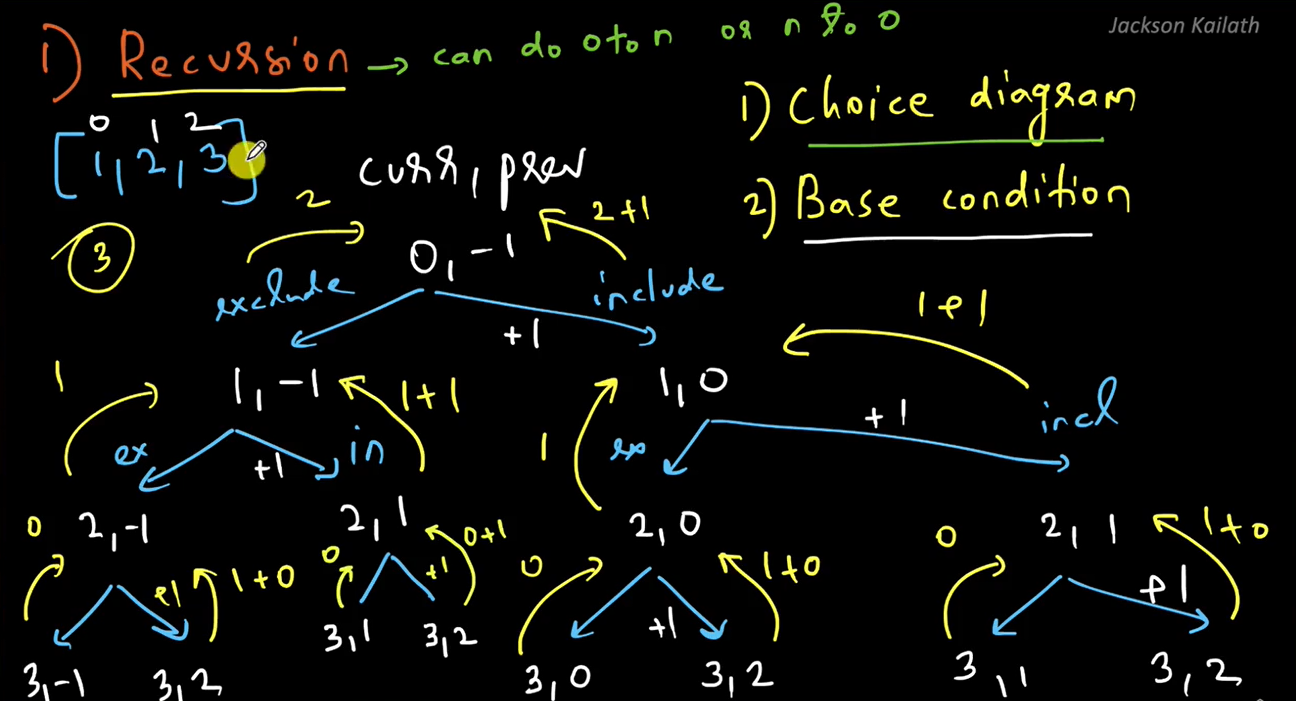

# LIS(longest increasing subsequence ) problem Recursion-approach[complexity analysis]:
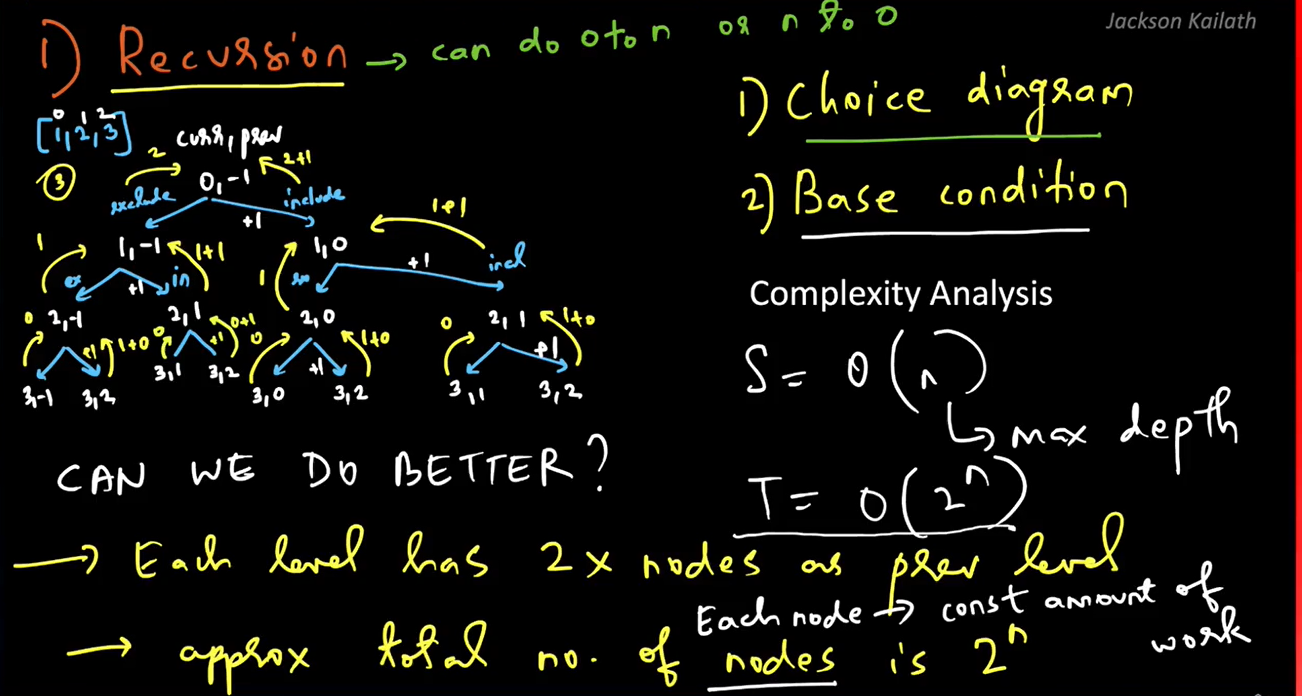
# LIS(longest increasing subsequence ) problem Recursion-approach[code-implementation]:
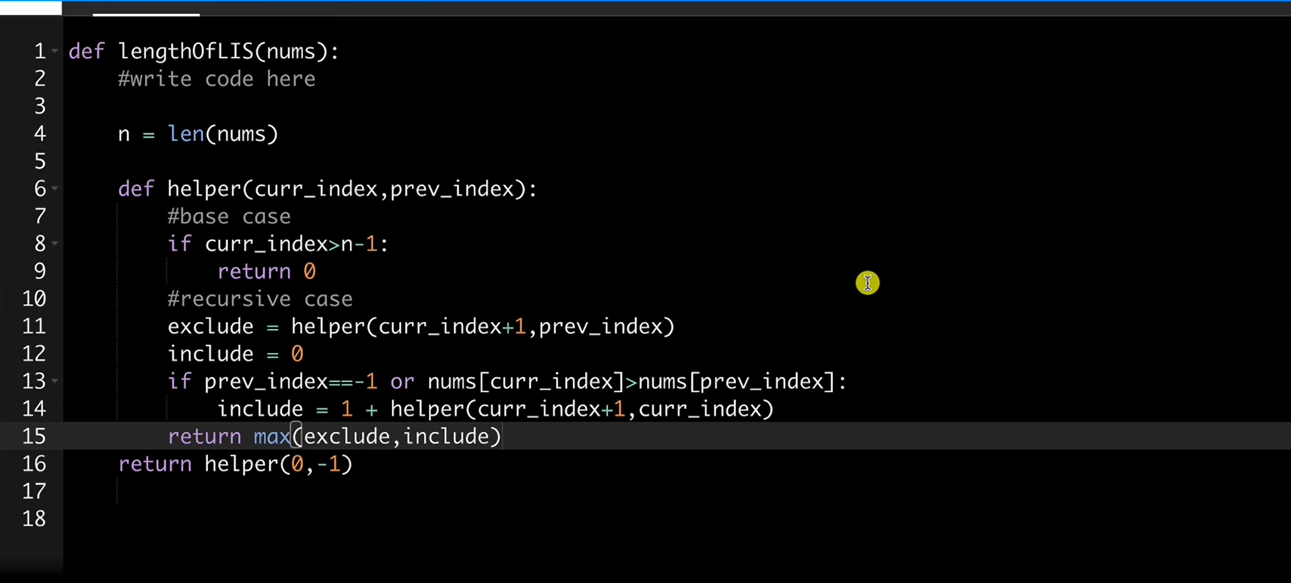

In [3]:
# code implementation of recursive approach for solving the LIS problem 

def lengthOfLIS(nums):
    n = len(nums)  # length of given num array 
    #recursive fn taking curr and prev element's indexes as argument
    def LIS_recursive(curr,prev): 
        #base-case : when index reahced end of num-array
        if curr >n-1:  
            return 0   # return zero as no curr-element available to be include or exclude 
        # exclusion : curr index move to the next while prev-index remained constant  [without adding 1 length]
        exclude = LIS_recursive(curr+1,prev)    
        # inclusion : curr-index move to the next while prev-index equals to curr-index [adding 1 length]
        include = 0    # we have to intialise include with zero first ; for further comparing purposes  //as if if-condition not satisfied include variable will lost its scope.
        if prev ==-1 or nums[curr] > nums[prev]:    # comparing :if curr-ele greater than prev-ele 
            include = 1 + LIS_recursive(curr+1,curr)   
        return max(include,exclude) # choosing the maximum length for LIS among these exclusion and inclusion branch-cases     
    return LIS_recursive(0,-1)  #out this recursive fn initialised with curr index  = 0 and prev index =-1(as no previous-element included yet)  


#example usage:
n= [1,2,1,4,3,4,5]
print(lengthOfLIS(n))# should be 5 LIS

n1 = [300,9,2,5,3,7,500,400]
print(lengthOfLIS(n1))# should be 4 LIS


5
4


In [4]:
def lengthOfLIS(nums):
    n = len(nums)
    def helper(curr,prev):
        if curr >n-1:
            return 0
        exclude = helper(curr+1,prev)    
        include = 0    
        if prev ==-1 or nums[curr] > nums[prev]:
            include = 1 + helper(curr+1,curr)   
        return max(include,exclude)     
    return helper(0,-1)    



# LIS(longest increasing subsequence ) problem memoisation(top-down)-approach:
### here we will use the 2-d dp_table to store the solutions of overlapping sub-problems recursively
### here for curr-index we start from 1 upto n-1 [n-values]
### here for prev-index we start from -1 upto n-2  ; for designing of dp_table porpuse we offset it by 1 = from 0 upto n-1 [IMP] ;
- it means in the dp_table prev zero representing the prev-index = -1 and so on true for further prev indexes on dp_table 
### dp_table would be of curr*prev (row * colm)
### intialised dp_table all cells with -1 first //denoting as no element included yet

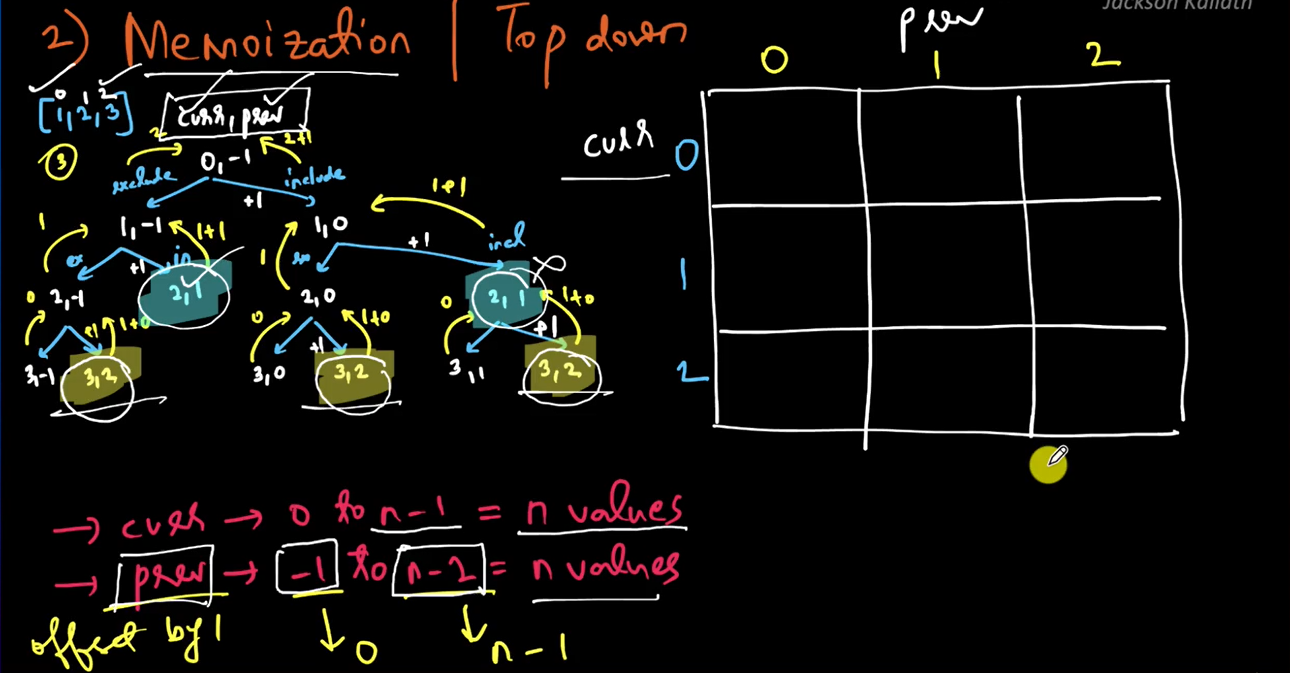

### if not -1 return the value from dp_table at corresponding indexes.
### else calclulate solution and store the solution in dp_table at corresponding indexes
 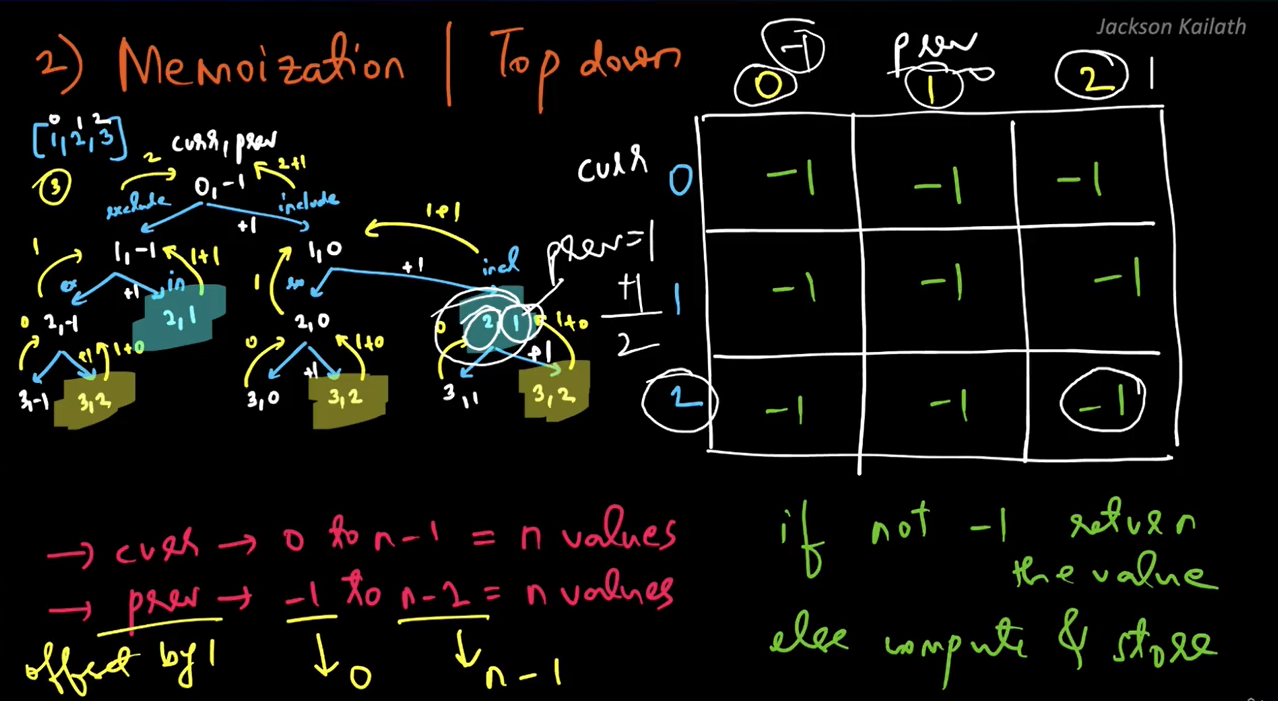

# LIS(longest increasing subsequence ) problem memoisation(top-down)-approach [complexity analysis]:
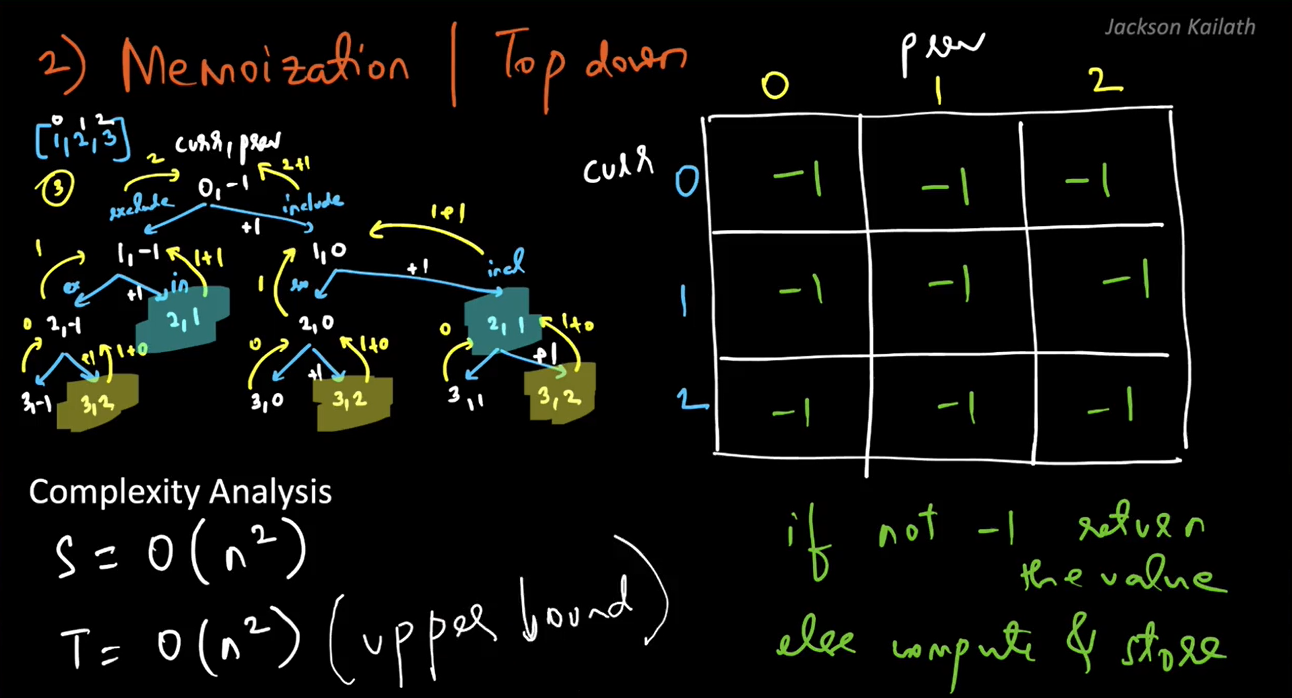


In [14]:
# code implementation of memoisation(top-down) approach for solving the LIS problem 

def lengthOfLIS(nums):
    n = len(nums)  # length of given num array 
    # here we're going to construct 2-d dp_table of dimensions n*n =(curr: 0 to n-1 [n values]; prev: -1 to n-2 [n values])
    dp = [[-1]*n for _ in range(n)] # intialised all cells with -1
     
    #recursive fn taking curr and prev element's indexes as argument
    def LIS_recursive_memo(curr,prev): 
        #base-case : when index reahced end of num-array
        if curr >n-1:  
            return 0   # return zero as no curr-element available to be include or exclude 
        # checking whether solution of subproblem at index exist or not if exist then return solution(value) from dp_table at corresponding indexes
        if dp[curr][prev+1] != -1:
            return dp[curr][prev+1]   # remember here we have to offset prev-index by one that's why using 'prev+1' here
        #if solution not existed in the dp_table ; calculate solution to subproblem and store it at corresponding indexes
        
        # exclusion : curr index move to the next while prev-index remained constant  [without adding 1 length]
        exclude = LIS_recursive_memo(curr+1,prev)    
        # inclusion : curr-index move to the next while prev-index equals to curr-index [adding 1 length]
        include = 0    # we have to intialise include with zero first ; for further comparing purposes  //as if if-condition not satisfied include variable will lost its scope.
        if prev ==-1 or nums[curr] > nums[prev]:    # comparing :if curr-ele greater than prev-ele 
            include = 1 + LIS_recursive_memo(curr+1,curr)   
        dp[curr][prev+1] =  max(include,exclude) # storing the maximum length for LIS among these exclusion and inclusion branch-cases in the dp_table     
        return dp[curr][prev+1]
    return LIS_recursive_memo(0,-1)  #out this recursive fn initialised with curr index  = 0 and prev index =-1(as no previous-element included yet)  


#example usage:
n= [1,2,1,4,3,4,5]
print(lengthOfLIS(n))# should be 5 LIS

n1 = [300,9,2,5,3,7,500,400]
print(lengthOfLIS(n1))# should be 4 LIS


5
4
